In [1]:
import pandas as pd
pd.set_option("display.max_columns", 150)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import os
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from statannot import add_stat_annotation

os.chdir('../src')
import cca_functions

data_dir = os.path.join('..', 'data', 'paper_plot_data')

# Figure 3

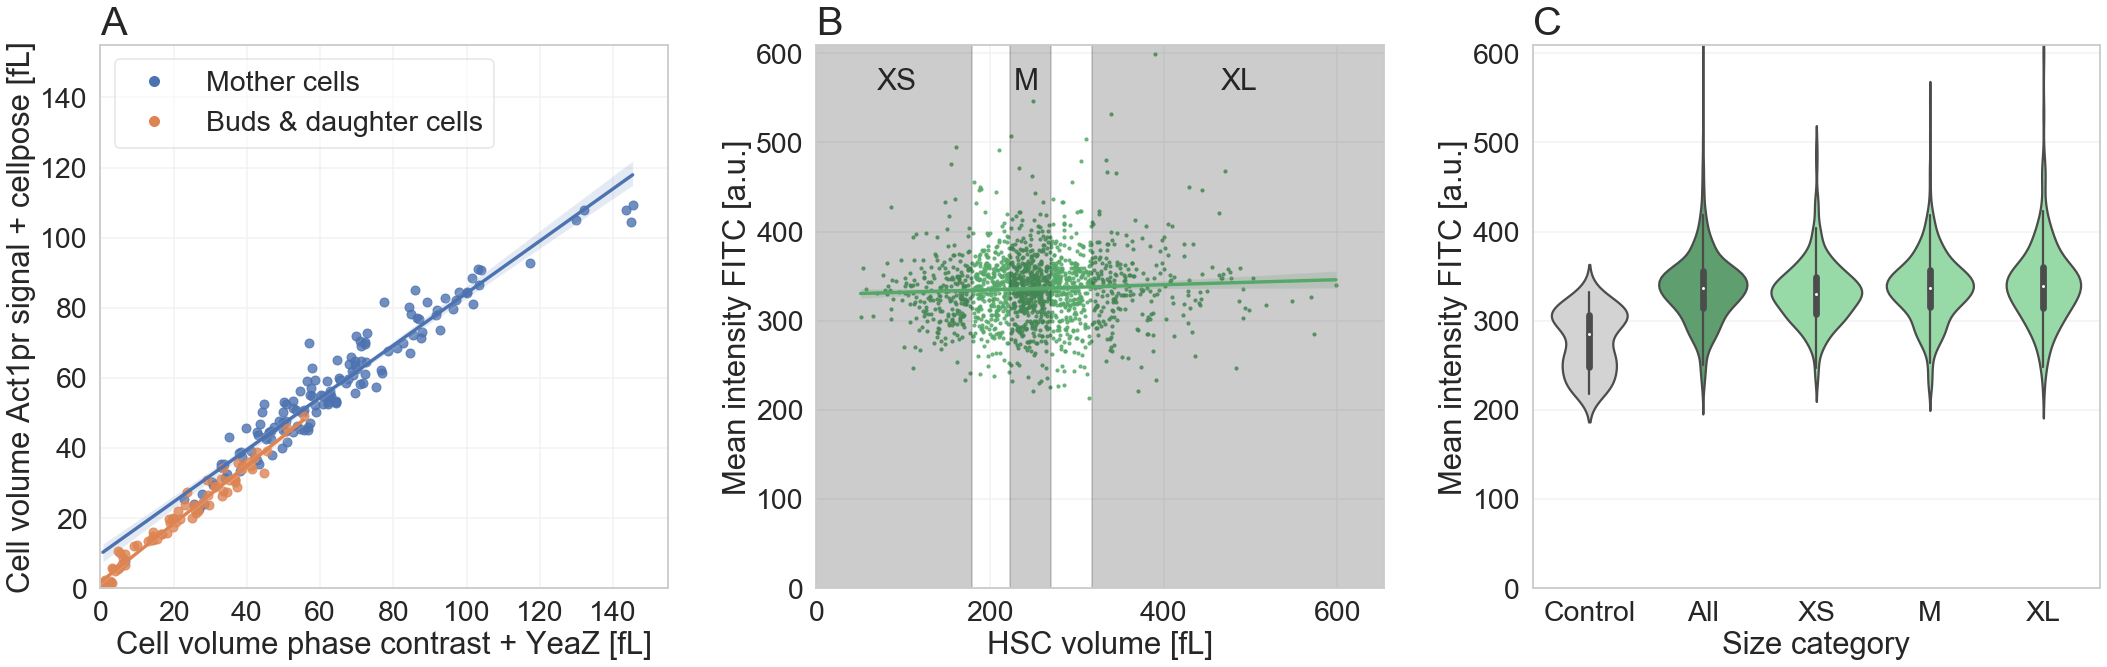

Sample size Fig. 3A: 113
Sample size Fig. 3B&3C: 1634
Sample size control Fig. 3C: 51
Effect size (cohen) All vs. Control: 1.51
Effect size (cohen) XS vs. Control: 1.55
Effect size (cohen) M vs. Control: 1.55
Effect size (cohen) XL vs. Control: 1.45
Effect size (glass) All vs. Control: 1.74
Effect size (glass) XS vs. Control: 1.6
Effect size (glass) M vs. Control: 1.74
Effect size (glass) XL vs. Control: 1.88


In [2]:
# load data from csv
plot_data3a = pd.read_csv(os.path.join(data_dir, 'plot_data3a.csv'))
plot_data3b = pd.read_csv(os.path.join(data_dir, 'plot_data3b.csv'))
plot_data3c = pd.read_csv(os.path.join(data_dir, 'plot_data3c_violin.csv'))

sns.set_theme(context='talk', font_scale=1.725)
sns.set_style("whitegrid", {"grid.color": ".95"})
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
# subplot 1
sns.regplot(
    data=plot_data3a[plot_data3a.relationship_cellpose=='mother'],
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    ax = axs[0],
    color = sns.color_palette()[0]
)
sns.regplot(
    data=plot_data3a[plot_data3a.relationship_cellpose=='bud'],
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    ax = axs[0],
    color = sns.color_palette()[1]
)
labels = [
    'Mother cells',
    'Buds & daughter cells'
]
handles = [
    mlines.Line2D([], [], color=sns.color_palette()[0], marker='o', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color=sns.color_palette()[1], marker='o', linestyle='None',
                          markersize=10)
]
axs[0].legend(
    handles=handles,
    labels=labels, 
    loc='upper left',
    framealpha=0.5
)
scatter_plot_max = max(plot_data3a.cell_vol_fl_yeaz.max(), plot_data3a.cell_vol_fl_cellpose.max())
axs[0].set_xlabel('Cell volume phase contrast + YeaZ [fL]')
axs[0].set_ylabel('Cell volume Act1pr signal + cellpose [fL]')
axs[0].set_title('A', fontsize=40, loc='left', pad=10)
axs[0].set_ylim(0, int(scatter_plot_max)+10)
axs[0].set_xlim(0, int(scatter_plot_max)+10)
axs[0].set_xticks(np.arange(0, scatter_plot_max+10, 20))
axs[0].set_yticks(np.arange(0, scatter_plot_max+10, 20))
#axs[0].set_aspect('equal', adjustable=None,)
#axs[0].axis('scaled')
# subplot 2
sns.regplot(
    data=plot_data3b,
    x='cell_vol_fl',
    y='FITC_mean',
    ax = axs[1],
    color=sns.color_palette()[2],
    scatter_kws={'s':10}
    #hue='size_category'
)
axs[1].set_xlabel('HSC volume [fL]')
axs[1].set_ylabel('Mean intensity FITC [a.u.]')
#lower_y_border, upper_y_border = plot_data3b.FITC_mean.min()-10, plot_data3b.FITC_mean.max()+10
lower_y_border, upper_y_border = 0, plot_data3c.FITC_mean.max()+10
height = upper_y_border - lower_y_border
# configure borders for "size blocks"
xs_borders = 0, np.percentile(plot_data3b.cell_vol_fl, 15)
m_borders = np.percentile(plot_data3b.cell_vol_fl, 35), np.percentile(plot_data3b.cell_vol_fl, 65)
xl_borders = np.percentile(plot_data3b.cell_vol_fl, 85), np.percentile(plot_data3b.cell_vol_fl, 85)*2 + 20
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
# add gray rectangles for size categories
axs[1].add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.2)
)
axs[1].text(0.5*sum(xs_borders)-20, upper_y_border-50, 'XS', fontdict={'fontsize':30})
axs[1].add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.2)
)
axs[1].text(0.5*sum(m_borders)-20, upper_y_border-50, 'M', fontdict={'fontsize':30})
axs[1].add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.2)
)
axs[1].text(0.5*sum(xl_borders)-20, upper_y_border-50, 'XL', fontdict={'fontsize':30})
# set x and y limits manually
axs[1].set_xlim(0, xl_borders[1])
axs[1].set_ylim(lower_y_border, upper_y_border)
axs[1].set_title('B', fontsize=40, loc='left', pad=10)

# subplot 3
sns.violinplot(
    data=plot_data3c,
    x='size_category',
    y='FITC_mean',
    order=["Control", "All", "XS", "M", "XL"],
    palette=['lightgray', sns.color_palette()[2]]+ [sns.color_palette('pastel')[2]]*3,
    ax=axs[2]
    #inner='quartile'
)
axs[2].set_xlabel('Size category')
axs[2].set_ylabel('Mean intensity FITC [a.u.]')
axs[2].set_title('C', fontsize=40, loc='left', pad=10)
axs[2].set_ylim(lower_y_border, upper_y_border)

plt.tight_layout()
"""
plt.savefig(
    '../figures/figure3_final.png',
    dpi=300
)
"""
plt.show()

def calculate_effect_size_cohen(data, group1, group2, cat_column='size_category', val_column='FITC_mean'):
    data_gr1 = data[data[cat_column]==group1]
    data_gr2 = data[data[cat_column]==group2]
    n1 = len(data_gr1)
    n2 = len(data_gr2)
    s1 = np.var(data_gr1[val_column])
    s2 = np.var(data_gr2[val_column])
    cohen_s = np.sqrt(
        ((n1-1)*s1+(n2-1)*s2) / (n1+n2-2)
    )
    effect_size = (np.mean(data_gr1[val_column])- np.mean(data_gr2[val_column])) / cohen_s
    return effect_size

def calculate_effect_size_glass(data, group1, group2, cat_column='size_category', val_column='FITC_mean'):
    data_gr1 = data[data[cat_column]==group1]
    data_gr2 = data[data[cat_column]==group2]
    glass_s = np.std(data_gr2[val_column])
    effect_size = (np.mean(data_gr1[val_column])- np.mean(data_gr2[val_column])) / glass_s
    return effect_size

print(f'Sample size Fig. 3A: {len(plot_data3a)//2}')
print(f'Sample size Fig. 3B&3C: {len(plot_data3b)}')
print(f'Sample size control Fig. 3C: {len(plot_data3c[plot_data3c.size_category=="Control"])}')

print(f'Effect size (cohen) All vs. Control: {round(calculate_effect_size_cohen(plot_data3c, "All", "Control"), 2)}')
print(f'Effect size (cohen) XS vs. Control: {round(calculate_effect_size_cohen(plot_data3c, "XS", "Control"), 2)}')
print(f'Effect size (cohen) M vs. Control: {round(calculate_effect_size_cohen(plot_data3c, "M", "Control"), 2)}')
print(f'Effect size (cohen) XL vs. Control: {round(calculate_effect_size_cohen(plot_data3c, "XL", "Control"), 2)}')

print(f'Effect size (glass) All vs. Control: {round(calculate_effect_size_glass(plot_data3c, "All", "Control"), 2)}')
print(f'Effect size (glass) XS vs. Control: {round(calculate_effect_size_glass(plot_data3c, "XS", "Control"), 2)}')
print(f'Effect size (glass) M vs. Control: {round(calculate_effect_size_glass(plot_data3c, "M", "Control"), 2)}')
print(f'Effect size (glass) XL vs. Control: {round(calculate_effect_size_glass(plot_data3c, "XL", "Control"), 2)}')

# Figure 4

['Af control, sc at birth' 'Af control, m+b at cytokinesis'
 'Single cell at birth' 'Mother+bud at cytokinesis']


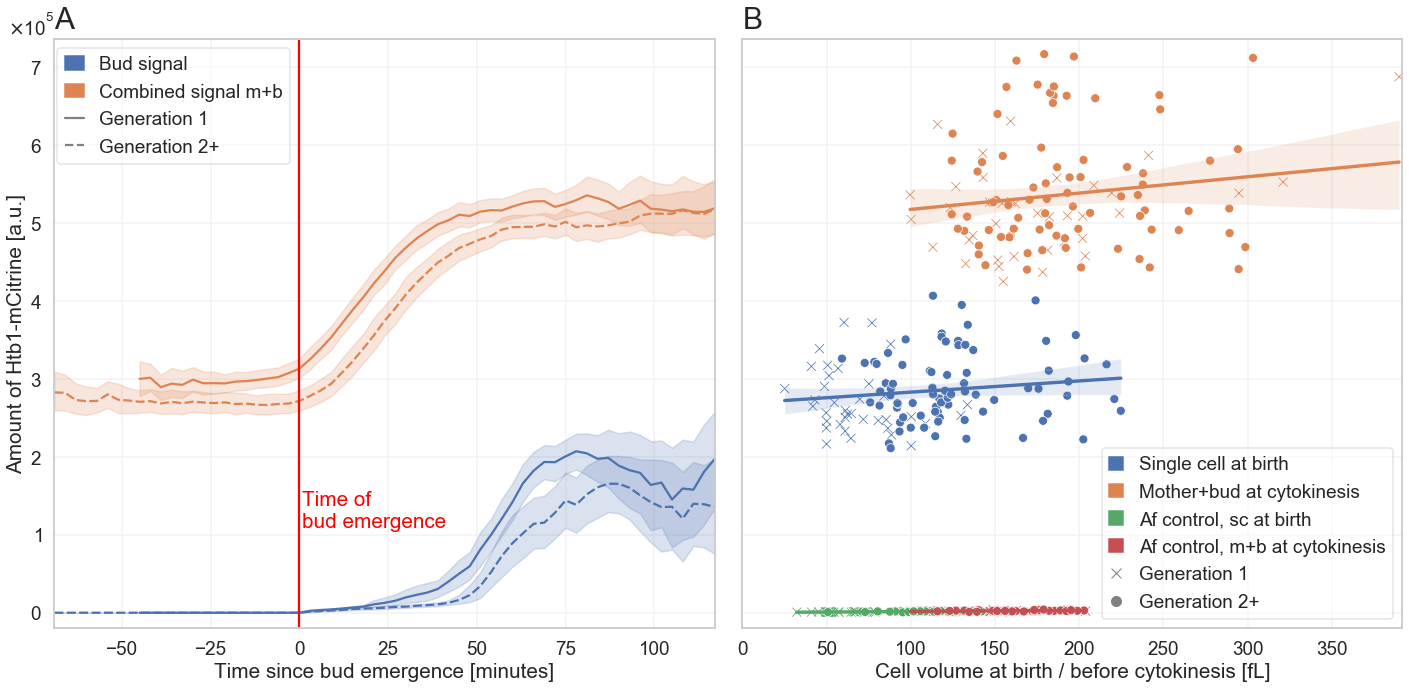

Fig 4A sample size: 117
Fig 4B sample size: 187
sample size flu-control: 70
sample size tagged strain: 117


In [22]:
plot_data4a = pd.read_csv(os.path.join(data_dir, 'plot_data4a.csv'))
plot_data4a_melted = pd.read_csv(os.path.join(data_dir, 'plot_data4a_melted.csv'))
plot_data4b = pd.read_csv(os.path.join(data_dir, 'plot_data4b.csv'))
sns.set_theme(context='talk', font_scale=1.15)
sns.set_style("whitegrid", {"grid.color": ".95"})
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

shared_y_max = plot_data4b.relevant_amount.max()+0.2e5
split_by_gen = True

# subplot 1
if split_by_gen:
    style='Generation'
else:
    style=None
sns.lineplot(
    data=plot_data4a_melted,#.sort_values('Pool, Phase'),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of calculation',
    style=style,
    ci=95,
    ax=axs[0],
    legend=False
)
axs[0].axvline(x=0, color='red')#, label='Time of Bud Emergence')
axs[0].text(
    0.7, 1.1e5, "Time of \nbud emergence", horizontalalignment='left', 
    size='medium', color='red', weight='normal'
)
# custom legend
labels = [
    'Bud signal',
    'Combined signal m+b',
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mlines.Line2D([], [], color='gray', linestyle='-'),
    mlines.Line2D([], [], color='gray', linestyle='--')
]
axs[0].legend(
    handles=handles,
    labels=labels, 
    loc='upper left',
    bbox_to_anchor = (-.01,1),
    framealpha=0.5,
    handlelength=1
)
#plt.setp(axs[0].get_legend().get_title(), fontsize='20') 
axs[0].set_ylabel("Amount of Htb1-mCitrine [a.u.]")
axs[0].set_xlabel("Time since bud emergence [minutes]")
axs[0].set_title('A', fontsize=30, loc='left', pad=10)
axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[0].get_yaxis().get_offset_text().set_position((-0.07, 0))
axs[0].set_ylim(-0.2e5, shared_y_max)
axs[0].set_xlim(
    plot_data4a_melted.centered_time_in_minutes.min(),
    plot_data4a_melted.centered_time_in_minutes.max()
)
#axs[0].legend().get_texts()[0].set_text(matplotlib.text.Text(text='test', fontweight=1000))

#subplot 2
# Initialize the figure
sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num==1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    marker='x',
    ax=axs[1]
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num>1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='o',
    ax=axs[1]
)
measurements = [
    'Single cell at birth',
    'Mother+bud at cytokinesis',
    'Af control, sc at birth',
    'Af control, m+b at cytokinesis'
]
# add regplots in for loop
print(pd.unique(plot_data4b['Kind of Measurement new']))
for idx, measure in enumerate(measurements):
    sns.regplot(
        x="relevant_volume", 
        y="relevant_amount", 
        data=plot_data4b[plot_data4b['Kind of Measurement new']==measure],
        color=sns.color_palette()[idx],
        scatter=False,
        ax=axs[1]
    )
labels = [
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mpatches.Patch(color=sns.color_palette()[2]),
    mpatches.Patch(color=sns.color_palette()[3]),
    mlines.Line2D([], [], color='gray', marker='x', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10)
]
axs[1].legend(
    handles=handles,
    labels=measurements+labels, 
    loc='lower right',
    #bbox_to_anchor = (1,0),
    framealpha=0.5,
    handlelength=0.75
)
axs[1].set_ylabel("Amount of Htb1-mCitrine [a.u.]")
axs[1].set_xlabel('Cell volume at birth / before cytokinesis [fL]')
# format y-axis
axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[1].get_yaxis().get_offset_text().set_position((-0.07, 0))
# format x-axis
axs[1].set_xlim(0, plot_data4b.relevant_volume.max()+2)
axs[1].set_ylim(-0.2e5, shared_y_max)
axs[1].set_title('B', fontsize=30, loc='left', pad=10)
plt.tight_layout()
"""
plt.savefig(
    os.path.join('..', 'figures', 'figure4_final.png'),
    dpi=300
)
"""
plt.show()
sample_size4a = len(plot_data4a[['position', 'Cell_ID', 'file', 'generation_num']].drop_duplicates())
sample_size4b = len(plot_data4b)
print(f'Fig 4A sample size: {sample_size4a}')
print(f"Fig 4B sample size: {int(sample_size4b/2)}")
print(f'sample size flu-control: {len(plot_data4b[plot_data4b.selection_subset==1])//2}')
print(f'sample size tagged strain: {len(plot_data4b[plot_data4b.selection_subset==0])//2}')

# Load raw data to create Figure 3

## configuration

In [4]:
stem_data = pd.read_csv(os.path.join(data_dir, 'stemcell_data.csv'))
# configure borders for "size blocks"
xs_borders = 0, np.percentile(stem_data.cell_vol_fl, 15)
m_borders = np.percentile(stem_data.cell_vol_fl, 35), np.percentile(stem_data.cell_vol_fl, 65)
xl_borders = np.percentile(stem_data.cell_vol_fl, 85), np.percentile(stem_data.cell_vol_fl, 85)*2 + 20
# In Fig. 3B very small cells are assumed to be imaging fragments, very large cells missed Segmentation errors
min_vol, max_vol = 50, xl_borders[0]*2
stem_selection_indices = np.logical_and(stem_data.cell_vol_fl>min_vol, stem_data.cell_vol_fl<max_vol)
stem_data = stem_data[stem_selection_indices]

## generate Act1-cellpose vs. PC-YeaZ Volume plot

In [5]:
phase_contr_yeaz_data = pd.read_csv(os.path.join(data_dir, 'SegmPhaseContr_YeaZ_AllPos_acdc_output.csv'))
cellpose_act1_data = pd.read_csv(os.path.join(data_dir, 'SegmACT1_Cellpose_AllPos_acdc_output.csv'))
merged_vol_data = pd.merge(
    phase_contr_yeaz_data,
    cellpose_act1_data,
    on=['Position_n', 'Cell_ID'],
    suffixes=('_yeaz', '_cellpose')
)

<Figure size 720x720 with 0 Axes>

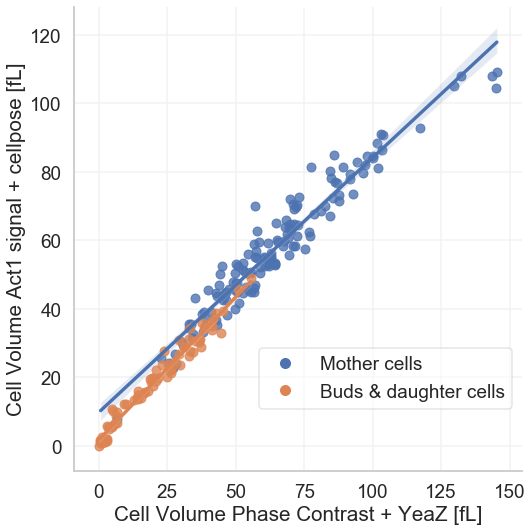

In [6]:
plt.figure(figsize=(10,10))
fig = sns.lmplot(
    data=merged_vol_data,
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    hue='relationship_cellpose',
    height=7.5,
    legend=False
)
ax = plt.gca()
labels = [
    'Mother cells',
    'Buds & daughter cells'
]
handles = [
    mlines.Line2D([], [], color=sns.color_palette()[0], marker='o', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color=sns.color_palette()[1], marker='o', linestyle='None',
                          markersize=10)
]
ax.legend(
    handles=handles,
    labels=labels, 
    loc='center right',
    bbox_to_anchor = (1,0.2),
    framealpha=0.5
)
ax.set_xlabel('Cell Volume Phase Contrast + YeaZ [fL]')
ax.set_ylabel('Cell Volume Act1 signal + cellpose [fL]')
plt.show()
#merged_vol_data.to_csv(os.path.join(data_dir, 'plot_data3a.csv'), index=False)

## generate scatter plot with "size blocks"

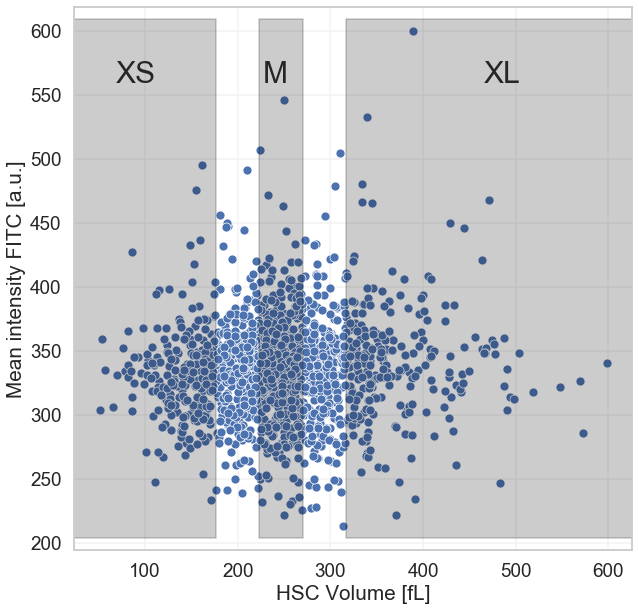

In [7]:
plt.subplots(figsize=(10,10))
sns.set_theme(context='talk', style='darkgrid')
ax = sns.scatterplot(
    data=stem_data,
    x='cell_vol_fl',
    y='FITC_mean',
    #hue='size_category'
)
ax.set_xlabel('HSC Volume [fL]')
ax.set_ylabel('Mean intensity FITC [a.u.]')
lower_y_border, upper_y_border = stem_data.FITC_mean.min()-10, stem_data.FITC_mean.max()+10
height = upper_y_border - lower_y_border
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
ax.add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(xs_borders)-20, upper_y_border-50, 'XS', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(m_borders)-20, upper_y_border-50, 'M', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(xl_borders)-20, upper_y_border-50, 'XL', fontdict={'fontsize':30})
"""
plt.savefig(
    '../figures/stemcell_scatter_v1.pdf',
    dpi=300
)
"""
plt.show()
#stem_data.to_csv(os.path.join(data_dir, 'plot_data3b.csv'), index=False)

## generate violin plots by size category

In [8]:
stem_bkgr_data = pd.read_csv(os.path.join(data_dir, 'stemcell_bkgr_data.csv'))
def generate_size_str(x):
    if x>=0 and x<=xs_borders[1]:
        return 'XS'
    elif x>=m_borders[0] and x<=m_borders[1]:
        return 'M'
    elif x>=xl_borders[0]:
        return 'XL'
    else:
        return 'rest'
all_data = stem_data.copy()
all_data['size_category'] = 'All'
stem_data['size_category'] = stem_data.cell_vol_fl.apply(generate_size_str)
stem_bkgr_data['size_category'] = 'Control'
violin_data = all_data.append(stem_data[stem_data.size_category!='rest']).append(stem_bkgr_data)

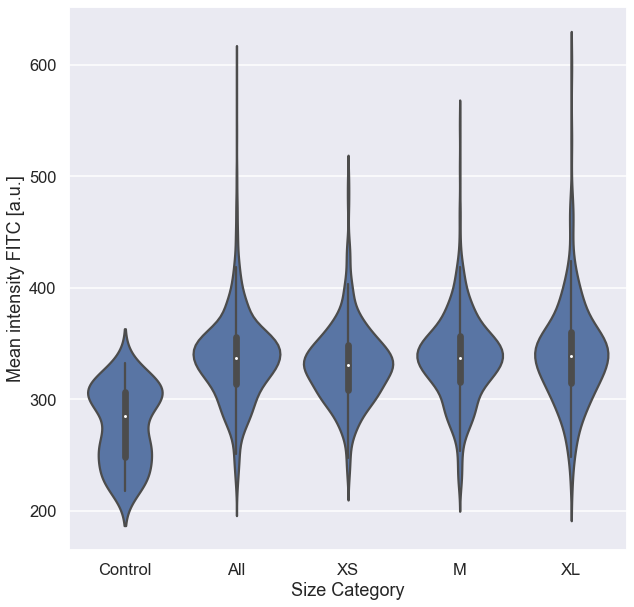

In [9]:
sns.set_theme(context='talk', style='darkgrid')
plt.figure(figsize=(10,10))
ax = sns.violinplot(
    data=violin_data,
    x='size_category',
    y='FITC_mean',
    order=["Control", "All", "XS", "M", "XL"],
    color=sns.color_palette()[0]
    #inner='quartile'
)
ax.set_xlabel('Size Category')
ax.set_ylabel('Mean intensity FITC [a.u.]')
"""
plt.savefig(
    '../figures/stemcell_violin_v1.pdf',
    dpi=300
)
"""
plt.show()
#violin_data.to_csv(os.path.join(data_dir, 'plot_data3c_violin.csv'), index=False)

# Load raw data to perform calculations for Figure 4
(same as in downstream-notebook but with fixed data selection)

## calculate downstream data based on raw image data

In [10]:
data_dirs, positions = (
    [
        '../data/raw_files/MIA_KC_test_files',
        '../data/raw_files/MIA_KC_test_files_flu_control'
    ],
    [
        ['Position_2', 'Position_3', 'Position_4', 'Position_5', 'Position_8'],
        ['Position_1', 'Position_3']
    ]
)
file_names = [os.path.split(path)[-1] for path in data_dirs]
image_folders = [[os.path.join(data_dir, pos_str, 'Images') for pos_str in pos_list] for pos_list, data_dir in zip(positions, data_dirs)]
# determine available channels based on first(!) position.
# Warn user if one or more of the channels are not available for some positions
first_pos_files = os.listdir(os.path.join(data_dirs[0], positions[0][0], 'Images'))
channels, warn = cca_functions.find_available_channels(first_pos_files)

In [11]:
overall_df = cca_functions.calculate_downstream_data(
    file_names,
    image_folders,
    positions,
    channels, 
    force_recalculation=False
)

Load files for MIA_KC_test_files, Position_2...
Number of cells in position: 18
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_test_files, Position_3...
Number of cells in position: 28
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_test_files, Position_4...
Number of cells in position: 54
Number of annotated frames in position: 241
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_test_files, Position_5...
Number of cells in position: 42
Number of annotated frames in position: 208
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_test_files, Position_8...
Number of cells in position: 45
Number of annotated frames in position: 222
Cell Cycle property data already existing, loaded from disk...
Load files for MIA_KC_test_files_flu_control, Position_1...
Numbe

## Alternatively load raw downstream data

In [12]:
data_dir = os.path.join('..', 'data', 'paper_plot_data')
overall_df = pd.read_csv(os.path.join(data_dir, 'raw_downstream_data_fig4.csv'))

C:\Users\mairhoermann\Anaconda3\envs\acdc2\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Perform all needed calculations for Figure 4

## Perform join on relative id (used in Fig 4)

In [13]:
# Join on Cell_ID vs. relative_ID to later calculate columns like "daughter growth" or "mother-bud-signal-combined"
overall_df_rel = overall_df.copy()
overall_df = overall_df.merge(
    overall_df_rel,
    how='left',
    left_on=['frame_i', 'relative_ID', 'max_frame_pos', 'file', 'selection_subset', 'position', 'directory'],
    right_on=['frame_i', 'Cell_ID', 'max_frame_pos', 'file', 'selection_subset', 'position', 'directory'],
    suffixes = ('', '_rel')
)
overall_df['mCitrine_combined_amount_mother_bud'] = overall_df.apply(
    lambda x: x.loc['mCitrine_corrected_amount']+x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['mCitrine_corrected_amount'],
    axis=1
)
overall_df['combined_mother_bud_volume'] = overall_df.apply(
    lambda x: x.loc['cell_vol_fl']+x.loc['cell_vol_fl_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['cell_vol_fl'],
    axis=1
)

## Perform grouping for data on cell-cycle-stage level (used in Fig 4)

In [14]:
# build dataframe grouped by phases
phase_grouped = overall_df.sort_values(
    'frame_i'
).groupby(
    ['Cell_ID', 'generation_num', 'cell_cycle_stage', 'relationship', 'position', 'file', 
     'max_frame_pos', 'selection_subset', 'max_t']
).agg(
    # perform some calculations relating to the whole phase:
    phase_area_growth=('cell_area_um2', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_volume_growth=('cell_vol_fl', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_area_at_beginning=('cell_area_um2', 'first'),
    phase_volume_at_beginning=('cell_vol_fl', 'first'),
    phase_volume_at_end=('cell_vol_fl', 'last'),
    phase_daughter_area_growth=('cell_area_um2_rel', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_daughter_volume_growth=('cell_vol_fl_rel', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_length=('frame_i', lambda x: max(x)-min(x)),
    phase_begin = ('frame_i', min),
    phase_end = ('frame_i', max),
    phase_mCitrine_amount_at_beginning = ('mCitrine_corrected_amount', 'first'),
    phase_mCitrine_mean_at_beginning = ('mCitrine_corrected_mean', 'first'),
    phase_mCitrine_concentration_at_beginning = ('mCitrine_corrected_concentration', 'first'),
    phase_mCitrine_amount_comb_end = ('mCitrine_combined_amount_mother_bud', 'last'),
    phase_volume_at_end_combined = (('combined_mother_bud_volume'), 'last')
).reset_index()

# detect complete cell cycle phases and complete cell cycles
temp = np.logical_and(
    phase_grouped.phase_begin > 0,
    phase_grouped.phase_end < phase_grouped.max_frame_pos
)
# this is for disappearing cells
complete_phase_indices = np.logical_and(
    temp,
    phase_grouped.phase_end < phase_grouped.max_t
)
phase_grouped['complete_phase'] = complete_phase_indices.astype(int)
no_of_compl_phases_per_cycle = phase_grouped.groupby(
    ['Cell_ID', 'generation_num', 'position', 'file']
)['complete_phase'].transform('sum')
complete_cycle_indices = no_of_compl_phases_per_cycle == 2
phase_grouped['complete_cycle'] = complete_cycle_indices.astype(int)
# append phase-grouped data to overall_df
overall_df = overall_df.merge(
    phase_grouped,
    how='left',
    on=['Cell_ID', 'generation_num', 'cell_cycle_stage', 'relationship', 'position', 'file', 
        'max_frame_pos', 'selection_subset', 'max_t']
)

## perform calculations for time plot (Fig. 4A)

In [15]:
# some configurations
# frame interval of video
frame_interval_minutes = 3
# quantiles of complete cell cycles (wrt phase lengths) to exclude from analysis 
# (not used, keep this for potential later use)
down_q, upper_q = 0, 1
# minimum number of cell cycles contributing to the mean+CI curve:
min_no_of_ccs = 10
# determine if you want to split the plot by generation
split_by_gen = True
# wether to scale to 0/1 or not
scale_data = False

In [16]:
# select needed cols from overall_df to not end up with too many columns
needed_cols = [
    'selection_subset', 'position', 'Cell_ID', 'cell_cycle_stage', 'generation_num', 'frame_i',
    'mCitrine_corrected_amount', 'mCitrine_corrected_amount_rel', 
    'file', 'relationship', 'relative_ID', 'phase_length', 'phase_begin', 'gui_mCitrine_amount_autoBkgr'
]
filter_idx = np.logical_and(overall_df['complete_cycle'] == 1, overall_df.selection_subset==0)
plot_data4a = overall_df.loc[filter_idx, needed_cols].copy()
# calculate the time the cell already spent in the current frame at the current timepoint
plot_data4a['frames_in_phase'] = plot_data4a['frame_i'] - plot_data4a['phase_begin'] + 1
# calculate the time to the next (for G1 cells) and from the last (for S cells) G1/S transition  
plot_data4a['centered_frames_in_phase'] = plot_data4a.apply(
    lambda x: x.loc['frames_in_phase'] if\
    x.loc['cell_cycle_stage']=='S' else\
    x.loc['frames_in_phase']-1-x.loc['phase_length'],
    axis=1
)
# calculate combined signal and the "Pool, Phase ID" for the legend
# plot_data4a at this point only contains relationship==mother, 
# as generation_num==0 and relationship==bud are filtered out (incomplete cycle, cycles start with G1)
plot_data4a['Combined signal m&b'] = plot_data4a.apply(
    lambda x: x.loc['mCitrine_corrected_amount']+x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['mCitrine_corrected_amount'],
    axis=1
)
plot_data4a['Bud signal'] = plot_data4a.apply(
    lambda x: x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else 0,
    axis=1
)
# scale data if needed
if scale_data:
    maximum = max(
        plot_data4a['Combined signal m&b'].max(), 
        plot_data4a['Bud signal'].max()
    )
    plot_data4a['Combined signal m&b'] /= maximum
    plot_data4a['Bud signal'] /= maximum
# calculate min and max centered times per generation to eliminate up to a percentile
# (not used, as upper_q and lower_q are set to 100/0 respectively)
plot_data4a['min_centered_frames'] = plot_data4a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'min'
)
plot_data4a['max_centered_frames'] = plot_data4a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'max'
)
min_and_max = plot_data4a.groupby(
    ['Cell_ID', 'generation_num', 'position', 'file']
).agg(
    min_centered = ('min_centered_frames', 'first'),
    max_centered = ('max_centered_frames', 'first')
).reset_index()
min_val, max_val = np.quantile(
    min_and_max.min_centered, down_q
) * frame_interval_minutes, np.quantile(
    min_and_max.max_centered, upper_q
) * frame_interval_minutes
# perform selection (won't change anything if upper and lower are 100 and 0 respectively)
selection_indices = np.logical_and(
    plot_data4a.min_centered_frames*frame_interval_minutes>=min_val, 
    plot_data4a.max_centered_frames*frame_interval_minutes<=max_val
)
plot_data4a = plot_data4a[selection_indices]

In [17]:
# calculate centered time in minutes
plot_data4a['centered_time_in_minutes'] = plot_data4a.centered_frames_in_phase * frame_interval_minutes

# group dataframe to calculate sample sizes per generation
standard_grouped = plot_data4a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
).agg('count').reset_index()
plot_data4a['Generation'] = plot_data4a.apply(
    lambda x: f'1st ($n_1$={len(standard_grouped[standard_grouped.generation_num==1])})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={len(standard_grouped[standard_grouped.generation_num>1])})',
    axis=1
)
if split_by_gen:
    g_cols = ['centered_frames_in_phase', 'Generation']
else:
    g_cols = 'centered_frames_in_phase'
plot_data4a['contributing_ccs_at_time'] = plot_data4a.groupby(g_cols).transform('count')['selection_subset']
plot_data4a = plot_data4a[plot_data4a.contributing_ccs_at_time >= min_no_of_ccs]

# finally prepare data for plot (use melt for multiple lines)
sample_size_4a = len(standard_grouped)
avg_cell_cycle_length = round(standard_grouped.loc[:,'centered_time_in_minutes'].mean())*frame_interval_minutes
cols_to_plot = ['Bud signal', 'Combined signal m&b']
index_cols = [col for col in plot_data4a.columns if col not in cols_to_plot]
plot_data4a_melted = pd.melt(
    plot_data4a, index_cols, var_name='Method of calculation'
).sort_values('Method of calculation')
data_dir = os.path.join('..', 'data', 'paper_plot_data')
# save preprocessed data for Fig. 4A
plot_data4a_melted.to_csv(os.path.join(data_dir, 'plot_data4a_melted.csv'), index=False)
plot_data4a.to_csv(os.path.join(data_dir, 'plot_data4a.csv'), index=False)

## generate time plot (Fig. 4A)

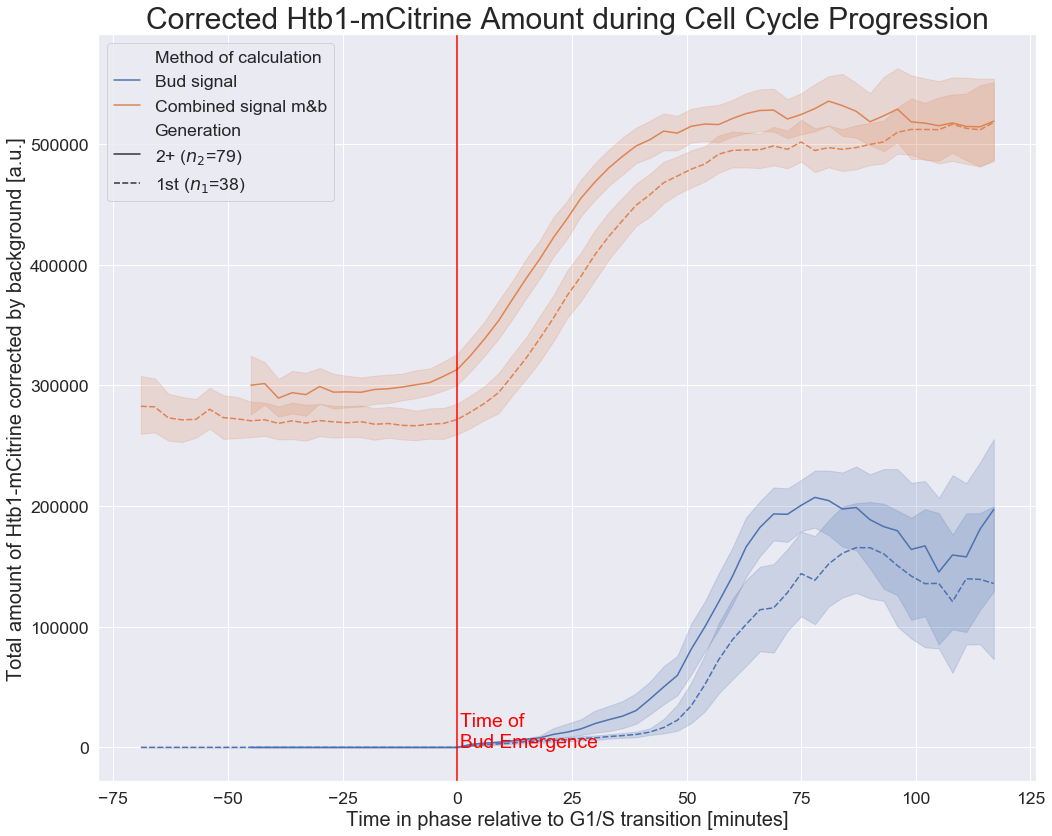

In [18]:
# plot the data, comment out "style" argument to not make difference between generations
sns.set_theme(style="darkgrid", font_scale=1.6)
f, ax = plt.subplots(figsize=(15, 12))
if split_by_gen:
    style='Generation'
else:
    style=None
ax = sns.lineplot(
    data=plot_data4a_melted,#.sort_values('Pool, Phase'),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of calculation',
    style=style,
    #style='position',
    ci=95
)
ax.axvline(x=0, color='red')#, label='Time of Bud Emergence')
ax.text(
    0.5, 0.21, "Time of \nBud Emergence", horizontalalignment='left', 
    size='medium', color='red', weight='normal'
)
ax.legend(
    #title=f'Avg CC Length: {avg_cell_cycle_length} min, n = {sample_size_4a}', 
    fancybox=True,
    labelspacing=0.5,
    handlelength=1.5,
    loc = 'upper left'
)
ax.set_ylabel("Total amount of Htb1-mCitrine corrected by background [a.u.]", fontsize=20)
ax.set_xlabel("Time in phase relative to G1/S transition [minutes]", fontsize=20)
ax.set_title("Corrected Htb1-mCitrine Amount during Cell Cycle Progression", fontsize=30)
plt.tight_layout()
"""
plt.savefig(
    os.path.join('..', 'figures', 'mCitrine_over_time_by_gen_v4.pdf'),
    dpi=300
)
"""
plt.show()

## perform calculations for volume at birth plot (Fig 4B)

In [19]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
needed_cols = [
    'Cell_ID', 'generation_num', 'position', 'file', 'cell_cycle_stage', 'selection_subset', 
    'phase_volume_at_beginning', 'phase_volume_at_end', 'phase_mCitrine_amount_at_beginning',
    'phase_mCitrine_amount_comb_end', 'phase_volume_at_end_combined'
]
plot_data4b = phase_grouped.loc[phase_grouped.complete_cycle==1, needed_cols]
scale_data = False

In [20]:
plot_data4b['relevant_volume'] = plot_data4b.apply(
    lambda x: x.loc['phase_volume_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_volume_at_end_combined'],
    axis=1
)
plot_data4b['relevant_amount'] = plot_data4b.apply(
    lambda x: x.loc['phase_mCitrine_amount_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_mCitrine_amount_comb_end'],
    axis=1
)
# defining a function to generate entries for the figure legend 
# (assuming that selection_subset>0 is the autofluorescence control of the experiment)
def calc_legend_entry(x):
    if x.loc['selection_subset'] == 0:
        if x.loc['cell_cycle_stage']=='G1':
            return 'Single cell at birth'
        else:
            return 'Mother+bud at cytokinesis'
    else:
        if x.loc['cell_cycle_stage']=='G1':
            return 'Af control, sc at birth'
        else:
            return 'Af control, m+b at cytokinesis'
        
plot_data4b['Kind of Measurement'] = plot_data4b.apply(
    lambda x: 'Single Cell in G1 (Frame after Cytokinesis)' if\
    x.loc['cell_cycle_stage']=='G1' else\
    'Combined Mother & Bud in S (Frame before Cytokinesis)',
    axis=1
)
plot_data4b['Kind of Measurement new'] = plot_data4b.apply(
    calc_legend_entry,
    axis=1
)
plot_data4b['Generation'] = plot_data4b.apply(
    lambda x: f'1st ($n_1$={int(len(plot_data4b[plot_data4b.generation_num==1])/2)})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={int(len(plot_data4b[plot_data4b.generation_num>1])/2)})',
    axis=1
)
if scale_data:
    maximum = plot_data4b['relevant_amount'].max()
    plot_data4b['relevant_amount'] /= maximum
sample_size_4b = len(plot_data4b)
data_dir = os.path.join('..', 'data', 'paper_plot_data')
#plot_data4b.to_csv(os.path.join(data_dir, 'plot_data4b.csv'), index=False)

## generate volume at birth plot (Fig 4B)

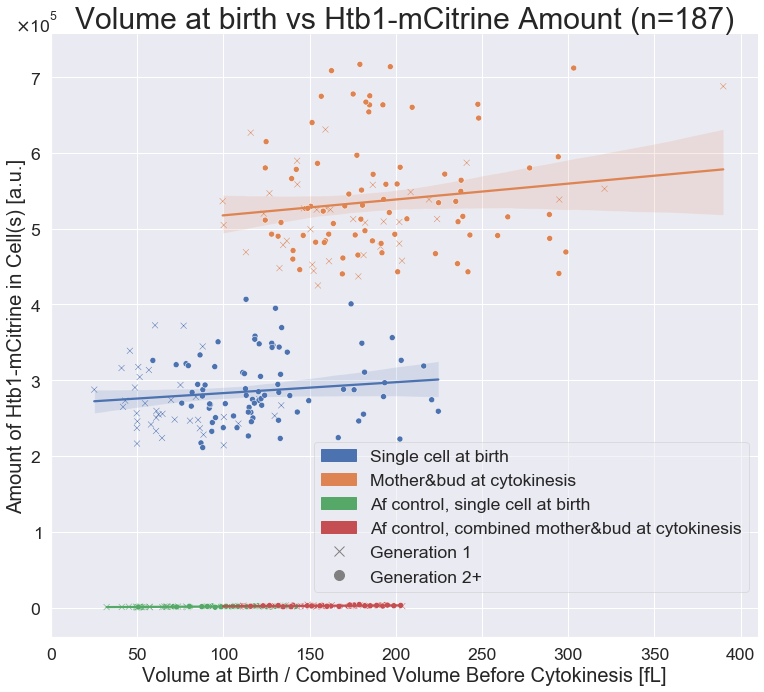

sample size flu-control: 70
sample size tagged strain: 117


In [21]:
#plot_data4b = plot_data4b[plot_data4b.selection_subset==1]
sns.set_theme(style="darkgrid", font_scale=1.6)
# Initialize the figure
sns.lmplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b.sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    #style="generation_num",
    #row="selection_subset",
    #sharex=False,
    height=10,
    aspect=1.1,
    scatter=False
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num==1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='x'
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4b[plot_data4b.generation_num>1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='o'
)

#g._legend.set_title('Kind of Measurement')
ax = plt.gca()
#ax.set(yscale="log2")
#ax.set_yscale('log', basey=2)
#ax.set_xscale('log', basex=10)
labels = [
    'Single cell at birth',
    'Mother&bud at cytokinesis',
    'Af control, single cell at birth',
    'Af control, combined mother&bud at cytokinesis',
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mpatches.Patch(color=sns.color_palette()[2]),
    mpatches.Patch(color=sns.color_palette()[3]),
    mlines.Line2D([], [], color='gray', marker='x', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10)
]
ax.legend(
    handles=handles,
    labels=labels, 
    loc='center right',
    bbox_to_anchor = (1,0.2),
    framealpha=0.5
)
ax.set_ylabel("Amount of Htb1-mCitrine in Cell(s) [a.u.]", fontsize=20)
ax.set_xlabel("Volume at Birth / Combined Volume Before Cytokinesis [fL]", fontsize=20)
ax.set_title(f"Volume at birth vs Htb1-mCitrine Amount (n={int(sample_size_4b/2)})", fontsize=30)
# format y-axis
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.get_yaxis().get_offset_text().set_position((-0.05,0))
# format x-axis
ax.set_xlim(0, plot_data4b.relevant_volume.max()+20)
plt.tight_layout()
"""
plt.savefig(
    os.path.join('..', 'figures', 'mCitrine_at_birth_and_cytokinesis_v5.pdf'),
    dpi=300
)
"""
plt.show()
print(f'sample size flu-control: {len(plot_data4b[plot_data4b.selection_subset==1])//2}')
print(f'sample size tagged strain: {len(plot_data4b[plot_data4b.selection_subset==0])//2}')